# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Read dataset

In [2]:
df = pd.read_csv('scores_data.csv')

In [3]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


# Explore datset

In [4]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [6]:
df.sample(10)

,Batch,User_ID,Score
10,AI_ELITE_7,uid_139,6 / 7
74,AI_ELITE_6,uid_75,7 / 7
124,AI_ELITE_4,uid_25,5 / 7
94,AI_ELITE_6,uid_55,4 / 7
40,AI_ELITE_7,uid_109,4 / 7
120,AI_ELITE_4,uid_29,3 / 7
109,AI_ELITE_4,uid_40,2 / 7
63,AI_ELITE_6,uid_86,7 / 7
39,AI_ELITE_7,uid_110,4 / 7
38,AI_ELITE_7,uid_111,3 / 7


In [7]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [9]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [10]:
df['User_ID '].duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
144    False
145    False
146    False
147    False
148    False
Name: User_ID , Length: 149, dtype: bool

In [11]:
df['Batch '].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [12]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

# Observations :

* Score column has 'object' data type instead of  int.<br>
* Problem in mentioned column names as threre was an extra space.<br>
* The given data is of three different batches 'AI_ELITE_7', 'AI_ELITE_6' and 'AI_ELITE_4'.

# Rename column names

In [13]:
df.rename(columns={'Batch ':'Batch','User_ID ':'User_ID', '   Score   ':'Score'},inplace=True)
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [14]:
df['Score']

0      6 / 7
1      6 / 7
2      7 / 7
3      7 / 7
4      4 / 7
       ...  
144    4 / 7
145    4 / 7
146    4 / 7
147    3 / 7
148    2 / 7
Name: Score, Length: 149, dtype: object

In [15]:
# split the 'Score' feature into two columns
df[['obtained_score', 'total_score']] = df['Score'].str.split('/', expand=True)

# remove the original 'Score' feature
df.drop('Score', axis=1, inplace=True)

In [16]:
df.head()

,Batch,User_ID,obtained_score,total_score
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7


In [17]:
df['obtained_score'] = df['obtained_score'].astype('int')

In [18]:
# calculate the average total score for each batch
avg_score = df.groupby('Batch')['obtained_score'].mean()

In [19]:
avg_score

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: obtained_score, dtype: float64

In [20]:
df['obtained_score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: obtained_score, dtype: float64

In [21]:
df['obtained_score'].mean()

4.382550335570469

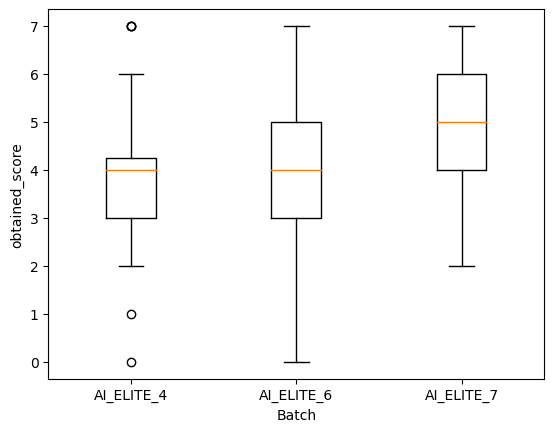

In [22]:
import matplotlib.pyplot as plt

# create a box plot
plt.boxplot([df[df['Batch'] == 'AI_ELITE_4']['obtained_score'], 
             df[df['Batch'] == 'AI_ELITE_6']['obtained_score'], 
             df[df['Batch'] == 'AI_ELITE_7']['obtained_score']])
plt.xticks([1, 2, 3], ['AI_ELITE_4', 'AI_ELITE_6', 'AI_ELITE_7'])
plt.xlabel('Batch')
plt.ylabel('obtained_score')
plt.show()

# Outcome :
**AI_ELITE_7 is performing well among all the batches as we can see in above plot. Also AI_ELITE_7 is the only batch which has large mean as compared to overall obtained_score mean.**